28-9-2021

# Welcome to a Complete Visual guide for Graph Theory 
   
## 1.0 So what are Graphs ? 
Graphs are objects connected through a line. These objects can be anything, Facebook profiles, cities, numbers, etc  
This is how a graph looks like  

![title](download.png)  


The circles are called a Node or Vertex.  
The lines connecting these nodes are called an edge.

Every node should have an unique identifier, in this case the identifier is an integer value. 
Some properties of this graph  
-> Total no of vertices, $|V| = 4$ and edges $|E| = 4 $  
-> The nodes are $ V_0, V_1, V_2, V_3 $  
->and the edges are  
$ e_{0, 1}, e_{1, 2}, e_{1, 3}, e_{2, 3} $

## 1.1 Representing graphs
   Now that we have gone through how a graph looks like, lets talk about how to write them programmatically. 

There are 2 standard graph representations,

## 1.2  Adjacency matrix
   Adjacency matrix is a Nodes X Nodes / V X V matrix where the rows and columns represent a node.  
   The cell of $ith$ row(node) and $jth$ column(node) takes two values$ 0 / 1$, representing whether an edge between  
   the nodes exists or not.
   ```
   ----V0-V1-V2-V3-----
   V0 |0 |1 |0 |0 |
   V1 |1 |0 |1 |1 |
   V2 |0 |1 |0 |1 |
   V3 |0 |1 |1 |0 |
   ```
   
*Lets get straight to coding.*

In [1]:
# import Matplotlib, numpy and networkx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
# Just removing the ugly frame lines
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

# Lets define some colors for aesthetic purposes
RED = '#e54d35'
ORANGE = '#fdbc6c'
YELLOW = '#fefebe'
LIME = '#b3de72'
GREEN = '#3faa5a'
sns.color_palette([RED, ORANGE, YELLOW, LIME, GREEN])

[(0.8980392156862745, 0.30196078431372547, 0.20784313725490197),
 (0.9921568627450981, 0.7372549019607844, 0.4235294117647059),
 (0.996078431372549, 0.996078431372549, 0.7450980392156863),
 (0.7019607843137254, 0.8705882352941177, 0.4470588235294118),
 (0.24705882352941178, 0.6666666666666666, 0.35294117647058826)]

In [2]:
# Create an adjacency matrix for our graph
V = 5 # we will draw 5 vertices
# Lets define some edges in the graph, we will keep the edges as a list of tuples
E = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4)]
adj_mat = np.zeros((V, V))
for i, j in E:
    adj_mat[i, j] = 1
    adj_mat[j, i] = 1
adj_mat

array([[0., 1., 1., 0., 0.],
       [1., 0., 1., 1., 0.],
       [1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

So we have created our adjacency matrix, lets draw the graph using networkx.

## 1.3  Drawing the Adjacency matrix using Networkx

In [3]:
# 1. Create a networkx graph object from the adjacency matrix using 'from_numpy_matrix()' function
G = nx.from_numpy_matrix(adj_mat)
type(G)

networkx.classes.graph.Graph

In [4]:
# 2. We will create a layout for drawing our graph.
# Layouts are nodes and edge positioning information / coordinates for our canvas  
# We will use the 'neato' layout program
pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
print('The Node Coordinates')
pos

The Node Coordinates


{0: (-60.525, -51.768),
 1: (-39.673, 17.069),
 2: (10.955, -42.2),
 3: (19.254, 68.051),
 4: (69.988, 8.848)}

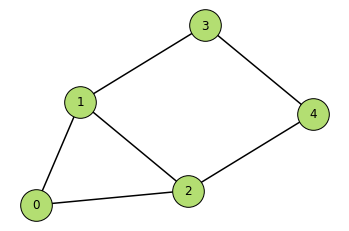

In [5]:
# 3. Call the 'draw_networx', that actually does the graph drawing
nx.draw_networkx(G,        # The newtorkx Graph object
                 pos=pos,  # layout
                 node_color=LIME,
                 node_size=1000,
                 edgecolors='k',  # node boundry color not the actual edge color
                 width=1.5    # line width of edges
                )
plt.show()

## 1.4 Adjacency List
   The adjacency matrix contains both informations, if an edge exist between two nodes or not. If you think about it  
   we don't really need to store whether an edge doesn't exist between two nodes. Simply knowing abut the existing edges  
   is enough. This way we remove the redundant spaces, i.e the zeros from our adjacency matrix.  
   
   Adjacency list is a list of lists, here each list index / position denotes a node $V_i$ , and the list at that index  
   contains  all the nodes that are connected with node $V_i$ via an edge.  
   
   The Adjacency matrix of the previous graph
```   
   |0|->[1, 2]  
   |1|->[0, 2, 3]    
   |2|->[0, 1, 4]    
   |3|->[1, 4]    
   |4|->[2, 3]   
```
**Lets code Adjacency List**   
## 1.5  Drawing the Adjacency matrix using Networkx

In [6]:
# Recall our nodes and edges
V = 5
E = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4)]

# Create a list of list of size V
adj_list = [[] for i in range(V)]
for u, v in E:
    adj_list[u].append(v)
    adj_list[v].append(u)
    
for l in adj_list:
    print(l)

[1, 2]
[0, 2, 3]
[0, 1, 4]
[1, 4]
[2, 3]


In [7]:
# We will create a function to create the graph this time
def from_adj_list(adj_list):
    # Create an empty graph object
    G = nx.Graph()
    
    for u, lst in enumerate(adj_list):
        for v in lst:
            # keep adding all the edges, nx automatically fetches the nodes from the edges
            G.add_edge(u, v)
    return G
G = from_adj_list(adj_list)

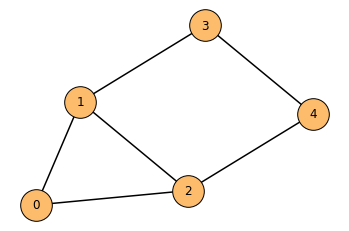

In [8]:
pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G,
                 pos=pos,
                 node_color=ORANGE,
                 node_size=1000,
                 edgecolors='k',
                 width=1.5
                )
plt.show()

## 1.6 Day 1 ,Summary  
  So far we have learned how to represent and draw Graphs using networkx.  
We really haven't discussed much about the layout system of Graphs in networkx. Just keep that in mind that  
There are a lot of ways we can draw the same graph, while it might be trivial for a human. A computer must needs to do  
some serious caculation to get the correct coordinates for the drawing.  
Heres some more layout of the same graph (Check here for more [layouts](https://networkx.org/documentation/stable/reference/drawing.html))

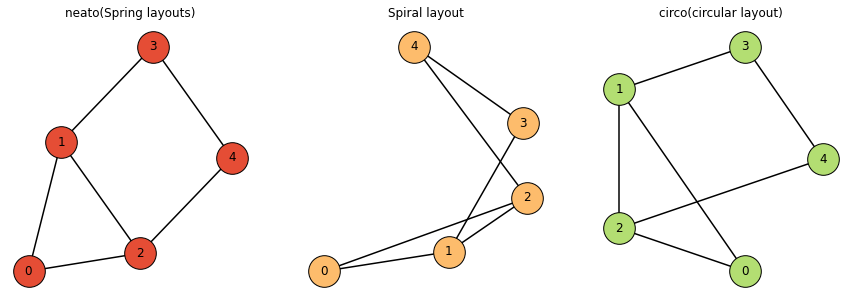

In [9]:
# Don't worry much about the code here, still feel free to play around
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

def draw_graph(G, pos, ax, color, title):
    ax.set_title(title)
    nx.draw_networkx(G,
                 pos=pos,
                 node_color=color,
                 node_size=1000,
                 edgecolors='k',
                 width=1.5,
                 ax=ax
                )
pos1 = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
draw_graph(G, pos1, axes[0], RED, 'neato(Spring layouts)')
pos2 = nx.drawing.layout.spiral_layout(G)
draw_graph(G, pos2,  axes[1], ORANGE, 'Spiral layout')
pos3 = nx.drawing.nx_pydot.graphviz_layout(G, prog='circo')
draw_graph(G, pos3, axes[2], LIME, 'circo(circular layout)')
plt.show()

As you can see the same graph using different layouts, We will work with 'neato' most of the times, it gives good  
result for most of the graphs.  
That's it for today, see ya in the next article !